# We are performing the Simple linear regression model we are going to predict the price of the land based on the area as a feature

# 1. Loading the library

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df=pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


### we are going to plot a scatter plot and see how the data has been distributed and based on that will see which model is best to use

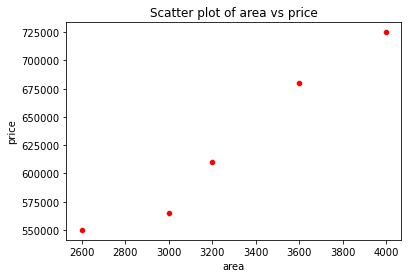

In [11]:
sns.scatterplot(x=df.area,y=df.price,markers='*',color='r')
plt.title('Scatter plot of area vs price')
plt.show()

### By visualizing the data we can say that by using the linear regression model we can easily predict the future data (by using the best fit line)

In [14]:
# will import linear regression library 

from sklearn.linear_model import LinearRegression

In [17]:
x=df.loc[:,df.columns!='price']
y=df.loc[:,df.columns=='price']

In [23]:
y=y.iloc[:,0]

In [24]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [27]:
model.predict([[3300]])

array([628715.75342466])

In [28]:
# now let we find the co-efficient and intercept 

In [29]:
model.coef_

array([135.78767123])

In [30]:
model.intercept_

180616.43835616432

## Y^=m*x+c   (m is coefficient and c is intercept, x is new predicted value)

In [31]:
135.78767123*3300+180616.43835616432

628715.7534151643

In [32]:
model.predict([[3300]])

array([628715.75342466])

## you can see that the model is also predicting the same

## (2) Predict price of a home with area = 5000 sqr ft

In [33]:
model.predict([[5000]])

array([859554.79452055])

# 

# Generate CSV file with list of home price predictions

In [35]:
new_area=pd.read_csv('areas.csv')
new_area.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


## now we are going to predict the price for this new area

In [38]:
predicted=model.predict(new_area)
predicted

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [39]:
new_area['predicted_price']=predicted
new_area

,area,predicted_price
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [40]:
# now will extract the data in to csv format

new_area.to_csv('newly predicted price.csv')

In [45]:
y_pred=model.predict(x)
y_pred

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [50]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
print('mse =',mse)
print('rmse =',rmse)

mse = 186815068.4931509
rmse = 13668.030893042014


In [53]:
x

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [54]:
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

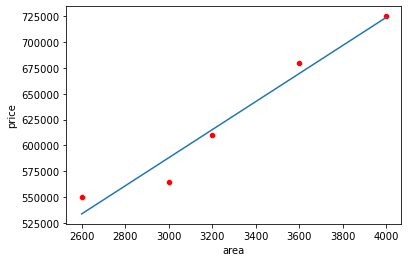

In [63]:
sns.scatterplot(x=x.iloc[:,0],y=y,color='r')
plt.plot(x,y_pred)